In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fixed point interation

In numerous applications, we encounter the task of solving equations of the form $$x = g(x)$$
for a continuous function $g$. In lab 03 we saw one simple method to solve such problems: $$x_{t+1} = g(x_t)\,.$$
We solved two apparently similar equations $x = log(1+x)$ and $x = log(2+x)$, with showed very different convergence.

## Newton steps

This week's task is to adapt the iterative algorithm to use Newton-style steps. Like in lab 03, we can do this by expressing the update step as a gradient-descent update and computing its second derivative.



## Plot $g$

Let us see how the two functions look over an interval $[0,2]$.

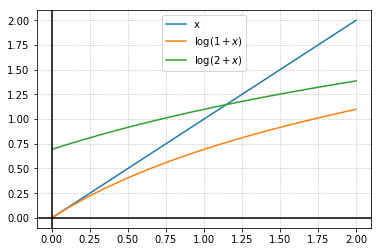

In [3]:
x = np.arange(0, 2, 0.0001)
y1 = np.log(1 + x)
y2 = np.log(2 + x)
fig = plt.figure()
plt.plot(x, x, label='x')
plt.plot(x, y1, label='$\log(1 + x)$')
plt.plot(x, y2, label='$\log(2 + x)$')
plt.grid(linestyle=':')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()

Please fill in the functions `fixed_point_newton` below:

In [24]:
def fixed_point_newton(initial_x, max_iters, objective, objective_grad):
    """Compute the fixed point."""
    # Define parameters to store x and objective func. values
    xs = []
    errors = []
    x = initial_x
    for n_iter in range(max_iters):
        # compute objective and error
        obj = objective(x)
        error = np.abs(x - obj)
        # store x and error
        xs.append(x)
        errors.append(error)
        
        ########################
        # @TODO Insert your code here
        # UPDATE x with a Newton step
        ########################
        grad = x - obj
        hessian = 1 - objective_grad(x)
        x = x - grad/hessian
        
        # print the current error
        if n_iter % 10 == 0: 
            print("Fixed point: iteration ={i}, x = {x:.2e}, error={err:.2e}".format(i=n_iter, x=x, err=error))
    return errors, xs

def fixed_point(initial_x, max_iters, objective):
    """Compute the fixed point."""
    # Define parameters to store x and objective func. values
    xs = []
    errors = []
    x = initial_x
    for n_iter in range(max_iters):
        # compute objective and error
        obj = objective(x)
        error = np.abs(x - obj)
        # store x and error
        xs.append(x)
        errors.append(error)
        # update x 
        x = obj
        # print the current error
        if n_iter % 10 == 0: 
            print("Fixed point: iteration ={i}, x = {x:.2e}, error={err:.2e}".format(i=n_iter, x=x, err=error))
    return errors, xs

Let's test the implementations and compare it to the original algorithm from lab 03:

In [25]:
# Define the parameters of the algorithm.
max_iters = 100

# Initialization
initial_x = 1

# Run fixed point.
errors_func1, xs_func1 = fixed_point(
    initial_x, 
    max_iters, 
    lambda x: np.log(1 + x)
)

errors_func1_newton, xs_func1_newton = fixed_point_newton(
    initial_x, 
    max_iters, 
    lambda x: np.log(1 + x), 
    lambda x: 1./(1. + x)
)


Fixed point: iteration =0, x = 6.93e-01, error=3.07e-01
Fixed point: iteration =10, x = 1.61e-01, error=1.37e-02
Fixed point: iteration =20, x = 9.00e-02, error=4.17e-03
Fixed point: iteration =30, x = 6.23e-02, error=1.98e-03
Fixed point: iteration =40, x = 4.76e-02, error=1.15e-03
Fixed point: iteration =50, x = 3.85e-02, error=7.51e-04
Fixed point: iteration =60, x = 3.23e-02, error=5.28e-04
Fixed point: iteration =70, x = 2.78e-02, error=3.91e-04
Fixed point: iteration =80, x = 2.45e-02, error=3.01e-04
Fixed point: iteration =90, x = 2.18e-02, error=2.39e-04
Fixed point: iteration =0, x = 3.86e-01, error=3.07e-01
Fixed point: iteration =10, x = 3.02e-04, error=1.83e-07
Fixed point: iteration =20, x = 2.95e-07, error=1.74e-13
Fixed point: iteration =30, x = 3.81e-10, error=1.07e-16
Fixed point: iteration =40, x = -8.19e-09, error=3.41e-17
Fixed point: iteration =50, x = 2.28e-08, error=1.18e-15
Fixed point: iteration =60, x = 1.28e-09, error=9.78e-17
Fixed point: iteration =70, x = 

Run your implementation on the second function

In [26]:
# Define the parameters of the algorithm.
max_iters = 100

# Initialization
initial_x = 1

# Run fixed point.
errors_func2, xs_func2 = fixed_point(
    initial_x, 
    max_iters, 
    lambda x: np.log(2 + x)
)

errors_func2_newton, xs_func2_newton = fixed_point_newton(
    initial_x, 
    max_iters, 
    lambda x: np.log(2 + x), 
    lambda x: 1./(2. + x)
)


Fixed point: iteration =0, x = 1.10e+00, error=9.86e-02
Fixed point: iteration =10, x = 1.15e+00, error=1.09e-06
Fixed point: iteration =20, x = 1.15e+00, error=1.14e-11
Fixed point: iteration =30, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =40, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =50, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =60, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =70, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =80, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =90, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =0, x = 1.15e+00, error=9.86e-02
Fixed point: iteration =10, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =20, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =30, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =40, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =50, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =60, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =70, x = 1

**Plotting error values**

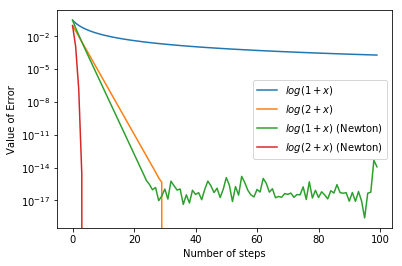

In [27]:
plt.semilogy()
plt.xlabel('Number of steps')
plt.ylabel('Value of Error')
#plt.yscale("log")
plt.plot(range(len(errors_func1)), errors_func1, label='$log(1 + x)$')
plt.plot(range(len(errors_func2)), errors_func2, label='$log(2 + x)$')
plt.plot(range(len(errors_func1_newton)), errors_func1_newton, label='$log(1 + x)$ (Newton)')
plt.plot(range(len(errors_func2_newton)), errors_func2_newton, label='$log(2 + x)$ (Newton)')

plt.legend()
plt.show()

What do you observe about the rates of convergence of the two methods? Can you explain this difference?